In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/house_prices.csv")
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [ ]:
df.describe()

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,8.757479
std,48239.423663,1.066000e+07,1.474217,1.255913,7.466471
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,4.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,6.700000
75%,119401.500000,1.550000e+07,5.000000,4.000000,10.000000
max,168445.000000,4.490000e+07,7.000000,6.000000,194.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0       0
property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


<Axes: xlabel='price', ylabel='Area_in_Marla'>

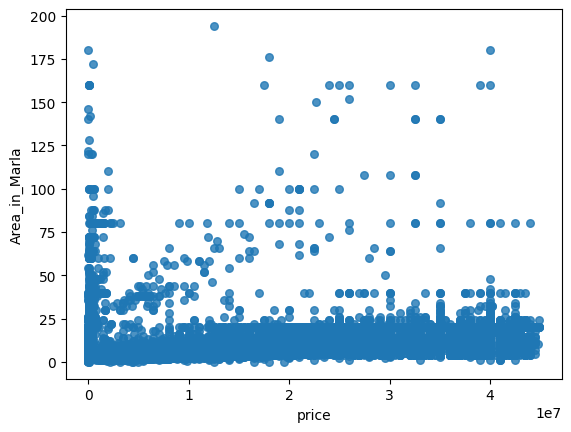

In [ ]:
df.plot(kind='scatter', x='price', y='Area_in_Marla', s=30, alpha=0.8)

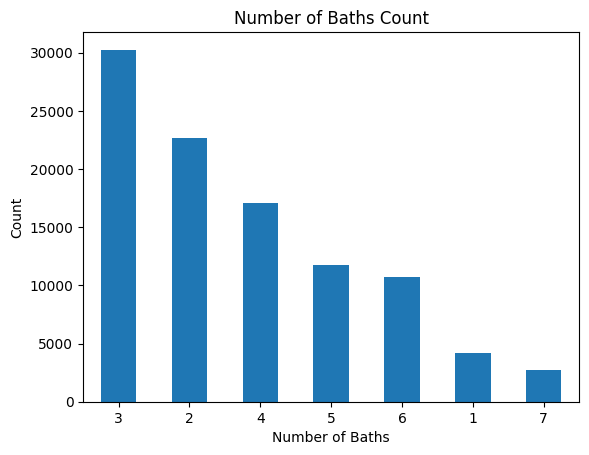

In [ ]:
baths_count = df['baths'].value_counts()
baths_count_sorted = baths_count.sort_index()
baths_count.plot(kind='bar')
plt.title('Number of Baths Count')
plt.xlabel('Number of Baths')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

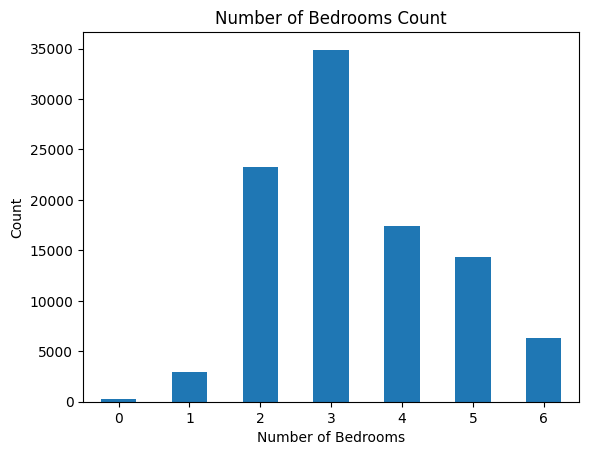

In [ ]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count_sorted = bedrooms_count.sort_index()
bedrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

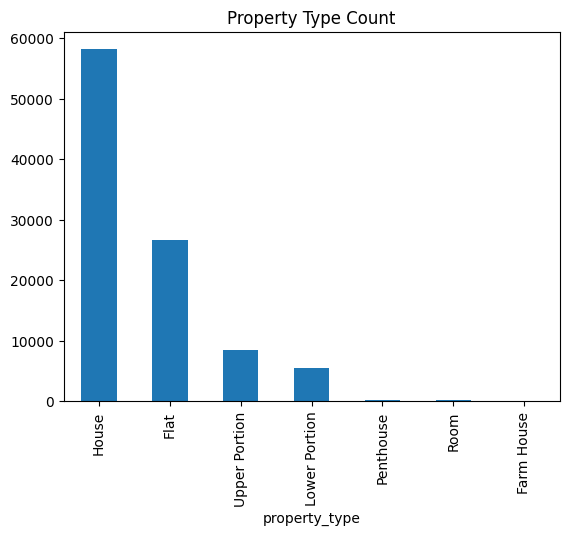

In [ ]:
property_type_count = df['property_type'].value_counts()
property_type_count.plot(kind='bar')
plt.title('Property Type Count')
plt.show()

By pie chart

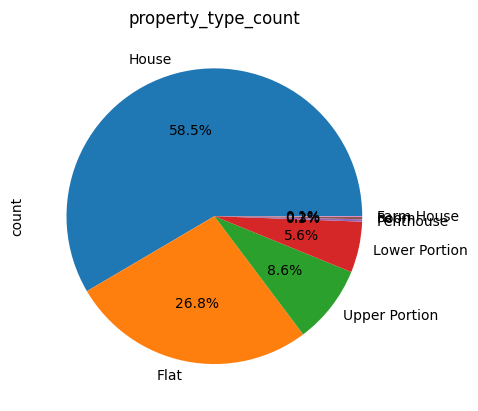

In [ ]:
property_type_count = df['property_type'].value_counts()
property_type_count.plot(kind='pie', autopct = '%1.1f%%')
plt.title('property_type_count')
plt.show()

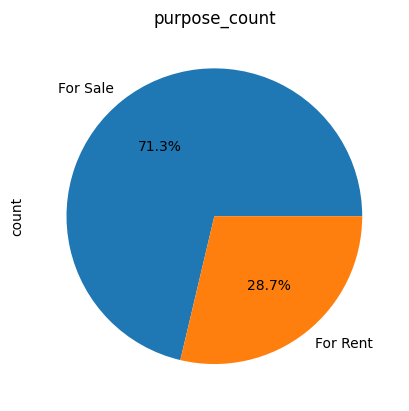

In [ ]:
purpose_count = df['purpose'].value_counts()
purpose_count.plot(kind='pie',autopct = '%1.1f%%')
plt.title('purpose_count')
plt.show()

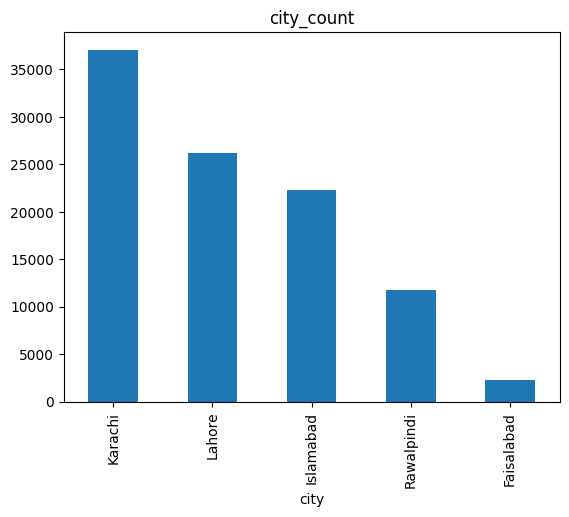

In [ ]:
city_count = df['city'].value_counts()
city_count.plot(kind='bar')
plt.title('city_count')
plt.show()

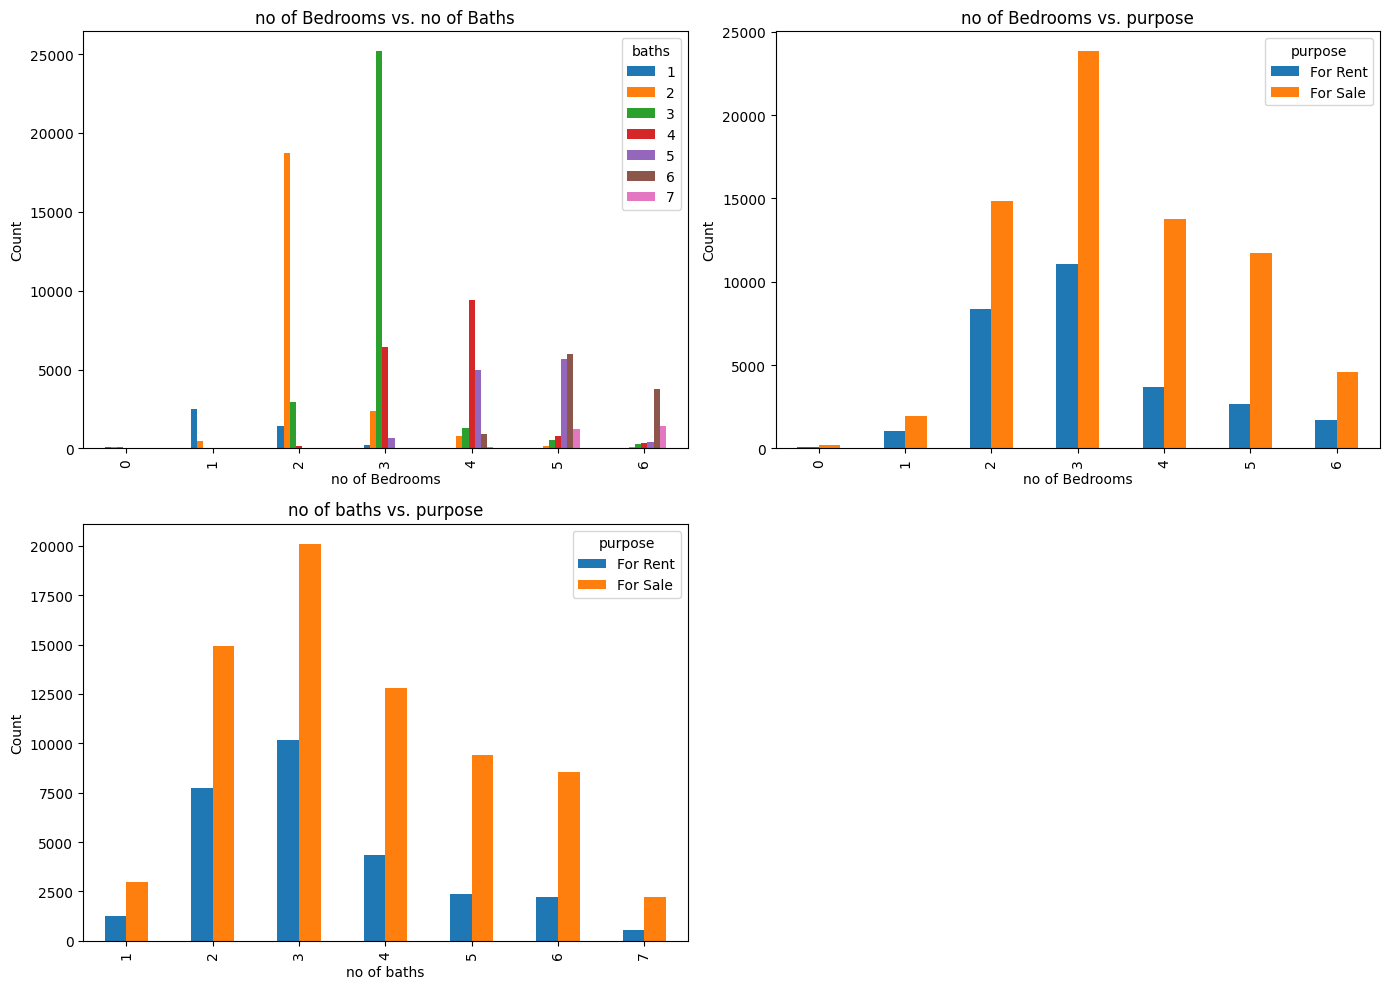

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
bedrooms_baths = pd.crosstab(df['bedrooms'], df['baths'])
bedrooms_baths.plot(kind='bar' , ax=axes[0, 0])
axes[0, 0].set_title('no of Bedrooms vs. no of Baths')
axes[0, 0].set_xlabel('no of Bedrooms')
axes[0, 0].set_ylabel('Count')
bedrooms_purpose = pd.crosstab(df['bedrooms'], df['purpose'])
bedrooms_purpose.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('no of Bedrooms vs. purpose')
axes[0, 1].set_xlabel('no of Bedrooms')
axes[0, 1].set_ylabel('Count')
baths_purpose = pd.crosstab(df['baths'], df['purpose'])
baths_purpose.plot(kind='bar' , ax=axes[1, 0])
axes[1, 0].set_title('no of baths vs. purpose')
axes[1, 0].set_xlabel('no of baths')
axes[1, 0].set_ylabel('Count')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoding_col = ['property_type', 'purpose', 'city', 'location']
for col in encoding_col:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,1,10000000,452,1,2,1,2,4.0
1,1,1,6900000,382,1,3,1,3,5.6
2,2,2,16500000,457,1,6,1,5,8.0
3,3,2,43500000,198,1,4,1,4,40.0
4,4,2,7000000,327,1,3,1,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,1,7500000,189,2,3,1,3,8.0
99495,168436,2,8800000,189,2,4,1,3,8.0
99496,168438,2,14000000,189,2,3,1,3,8.0
99497,168439,2,14000000,189,2,4,1,4,14.0


In [ ]:
x=df.drop(columns=['price'],axis = 1)
y=df['price']

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=50)

In [ ]:
In_model = LinearRegression()
In_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = In_model.predict(x_test)


In [ ]:
y_pred

array([[0.31945302],
       [0.27247822],
       [0.18448359],
       ...,
       [0.38715323],
       [0.19554156],
       [0.22296371]])

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

0.022875310263045612

In [ ]:
mae

0.11426260711193993

In [ ]:
In_acc = r2_score(y_test, y_pred)
In_acc

0.5926624911640123